Exploring Android App Market on Google Play Analysis (Python)

In [1]:
import pandas as pd

# Read the CSV file
apps = pd.read_csv("/content/apps.csv")

# Drop duplicates
apps.drop_duplicates(inplace=True)

# Print the total number of apps
total_apps = apps.shape[0]
print('Total number of apps in the dataset =', total_apps)

# Print a concise summary of apps dataframe
print(apps.info())

# Display a random sample of n rows
n = 5
sample = apps.sample(n)
print(sample)


Total number of apps in the dataset = 9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None
      Unnamed: 0                                              

#**Data cleaning**

In our analysis, we will primarily focus on four key features: Installs, Size, Rating, and Price. However, we've come across an obstacle during the data preprocessing phase. The Installs and Price columns contain special characters such as ",", "$", and "+", which poses a challenge in converting them into numerical values. To address this issue, our next step involves thorough data cleaning to effectively handle these non-numeric characters and ensure the accuracy of our analysis.

In [2]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']

# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Convert column to string and then replace the characters
    apps[col] = apps[col].astype(str).apply(lambda x: ''.join(filter(lambda char: char not in chars_to_remove, x)))

# Convert the cleaned columns back to numeric
apps['Installs'] = pd.to_numeric(apps['Installs'])
apps['Price'] = pd.to_numeric(apps['Price'])

# Print a summary of the apps dataframe
print(apps.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB
None


#**Exploring app categories**

Among 33 unique categories in our dataset, Family and Game apps stand out with the highest market presence. Notably, Tools, Business, and Medical apps also demonstrate significant prevalence, showcasing a diverse app landscape.

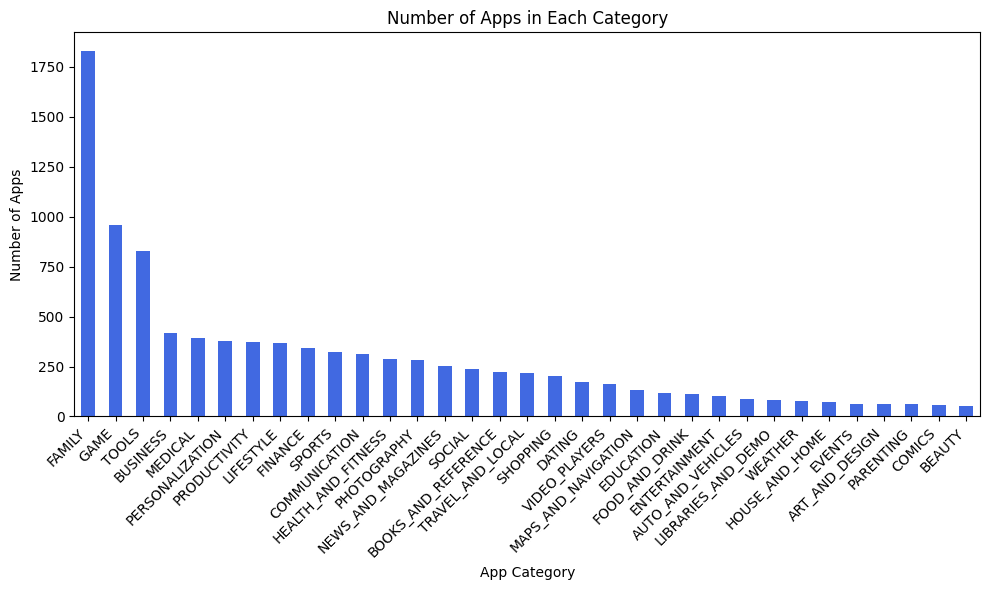

In [3]:
import matplotlib.pyplot as plt

# Count the number of apps in each category
category_counts = apps["Category"].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='royalblue')

# Customize labels and title
plt.xlabel('App Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in Each Category')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the bar graph
plt.tight_layout()
plt.show()

#**Distribution of app ratings**

App ratings, ranging from 1 to 5, significantly influence discoverability, conversions, and brand perception. Our findings reveal an average rating of 4.17 across all categories, with a right-skewed histogram indicating a predominance of highly-rated apps and few instances of lower ratings.






Average app rating = 4.173243045387994


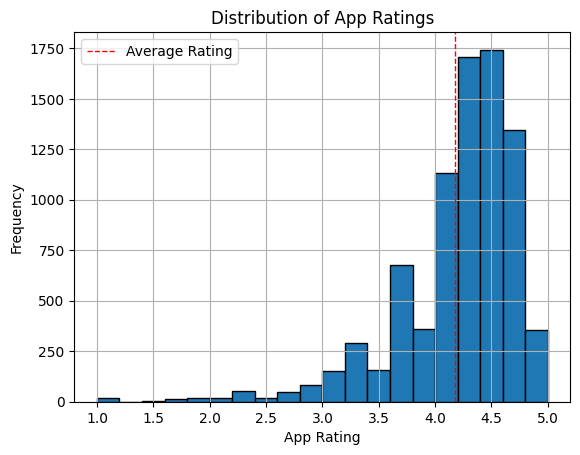

In [4]:
import matplotlib.pyplot as plt

# Calculate the average app rating
avg_app_rating = apps["Rating"].mean()
print('Average app rating =', avg_app_rating)

# Create a histogram
plt.hist(apps['Rating'], bins=20, edgecolor='black')
plt.axvline(avg_app_rating, color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('App Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings')

# Show the average rating line
plt.legend(['Average Rating'])
plt.grid(True)

# Display the histogram
plt.show()

#**Size and price of an app**

Our analysis reveals that app size can impact user ratings, with top-rated apps often falling within the range of 2 MB to 20 MB. Additionally, the majority of highly rated apps price themselves under $10, highlighting the significance of affordable pricing strategies for app success.

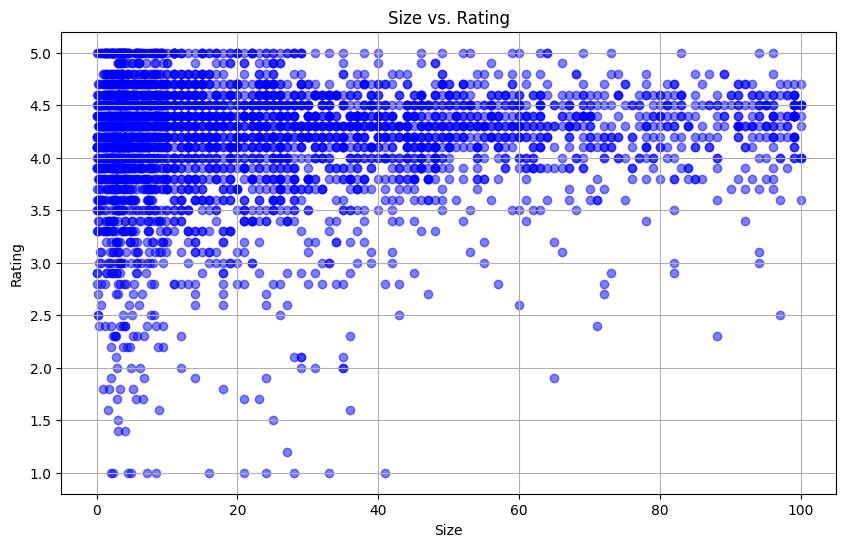

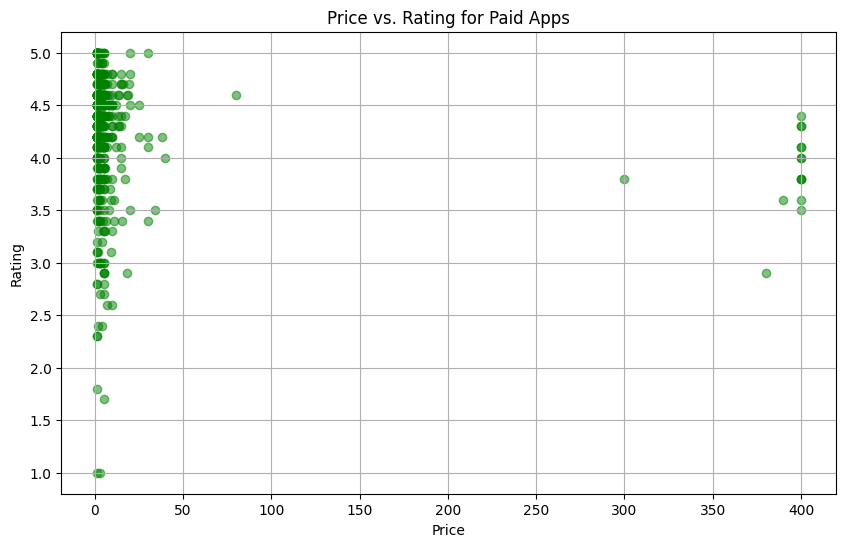

In [5]:
import matplotlib.pyplot as plt

# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = apps[(~apps["Rating"].isnull()) & (~apps["Size"].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250).reset_index()

# Create a scatter plot for Size vs. Rating
plt.figure(figsize=(10, 6))
plt.scatter(large_categories["Size"], large_categories["Rating"], color='blue', alpha=0.5)
plt.title("Size vs. Rating")
plt.xlabel("Size")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

# Create a scatter plot for Price vs. Rating
plt.figure(figsize=(10, 6))
plt.scatter(paid_apps["Price"], paid_apps["Rating"], color='green', alpha=0.5)
plt.title("Price vs. Rating for Paid Apps")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

#**Relation between app category and app price**

Developers and companies can employ various monetization strategies to ensure profitability for their mobile apps. Choosing the right pricing strategy involves understanding customer willingness to pay and perceived value. Factors such as app features, complexity, and category influence pricing decisions. While simpler and frequently used apps like calculators might remain free, specialized apps like medical diagnostics could justify higher price points.

 Our analysis reveals that medical and family apps tend to be the most expensive, while game apps are generally priced below $20.

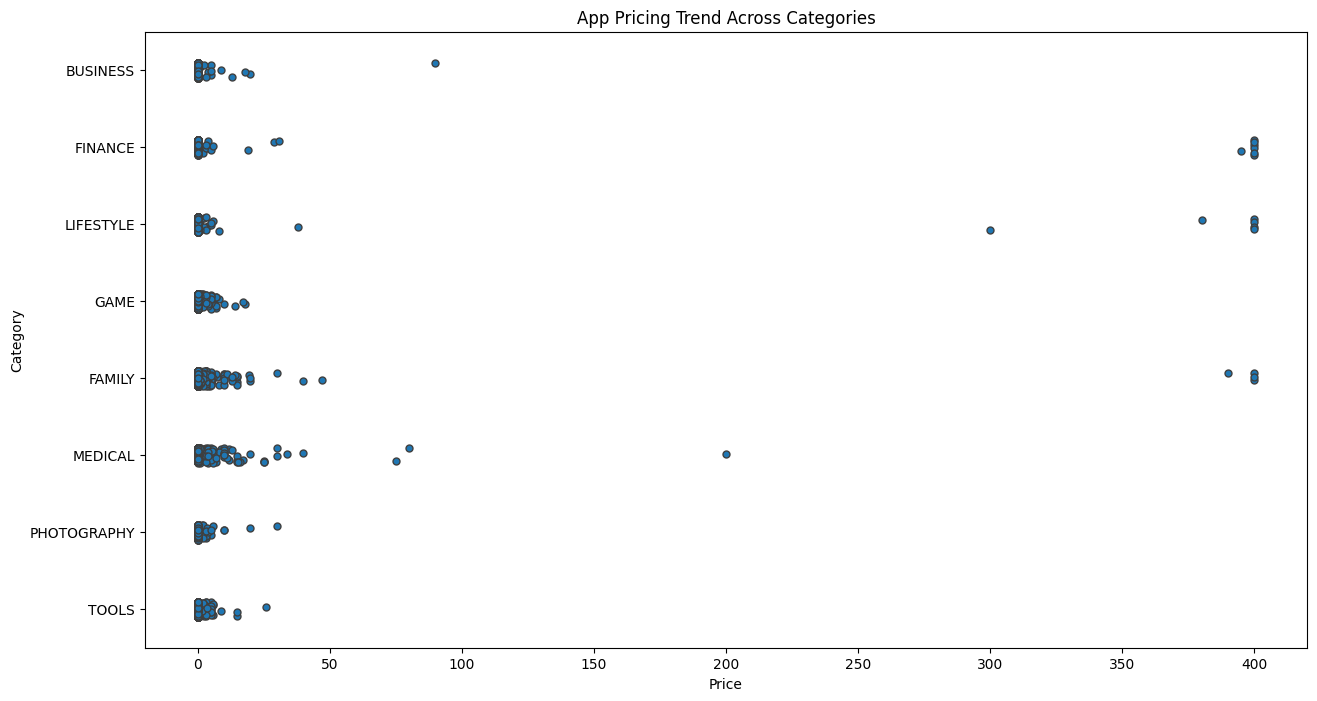

       Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         💎 I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE', 'BUSINESS'])]

# Create a strip plot to visualize the price trend by category
plt.figure(figsize=(15, 8))
sns.stripplot(x=popular_app_cats["Price"], y=popular_app_cats["Category"], jitter=True, linewidth=1)
plt.title('App Pricing Trend Across Categories')
plt.xlabel('Price')
plt.ylabel('Category')
plt.show()

# Filter and display apps with a price greater than 200
apps_above_200 = popular_app_cats[popular_app_cats["Price"] > 200]
print(apps_above_200[['Category', 'App', 'Price']])


#**Filtering out "junk" apps**


The analysis reveals that a portion of the higher-priced apps may fall into the category of "junk" apps, lacking a genuine purpose or utility. These could include apps created as jokes or for testing, sometimes with malicious intent to exploit accidental purchases. By filtering out such apps, a clearer distribution of apps priced under $20 emerges, allowing for a more accurate visualization of pricing trends.

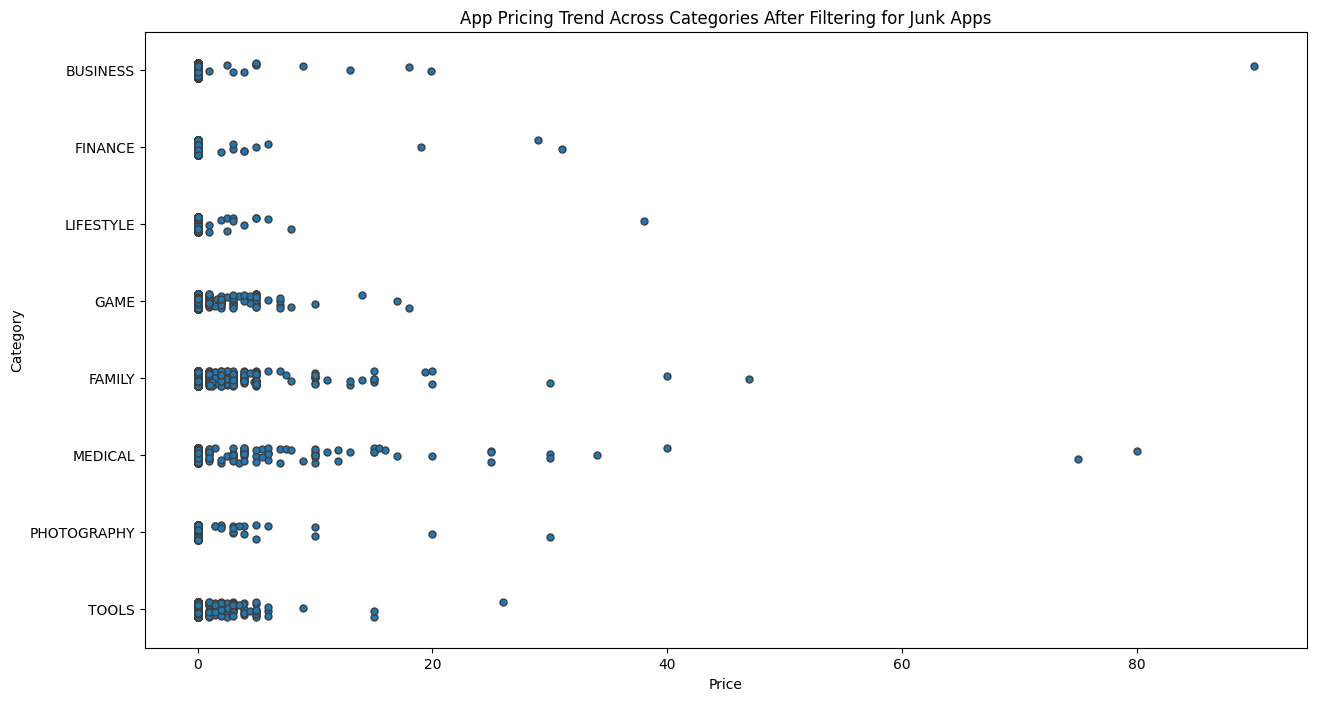

In [7]:

# Filter apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

# Create a figure and axes for visualization
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Create a strip plot with authentic apps after filtering
ax = sns.stripplot(x=apps_under_100["Price"], y=apps_under_100["Category"], data=apps_under_100,
                   jitter=True, linewidth=1)

# Set title and labels
ax.set_title('App Pricing Trend Across Categories After Filtering for Junk Apps')
ax.set_xlabel('Price')
ax.set_ylabel('Category')

# Display the enhanced visualization
plt.show()



#**Popularity of paid apps vs free apps**

In the realm of Play Store apps, two primary pricing strategies stand out: free and paid. Free apps are typically available for download without charge and often generate income through advertisements. They are commonly developed by companies as an extension of their products, aiding in customer retention and service. On the other hand, paid apps require a one-time payment for download and usage, and users may not have a trial period to assess the app before purchase.

When comparing the installation rates of free and paid apps, it becomes apparent that paid apps tend to have fewer installations than their free counterparts, although the discrepancy is not significant.

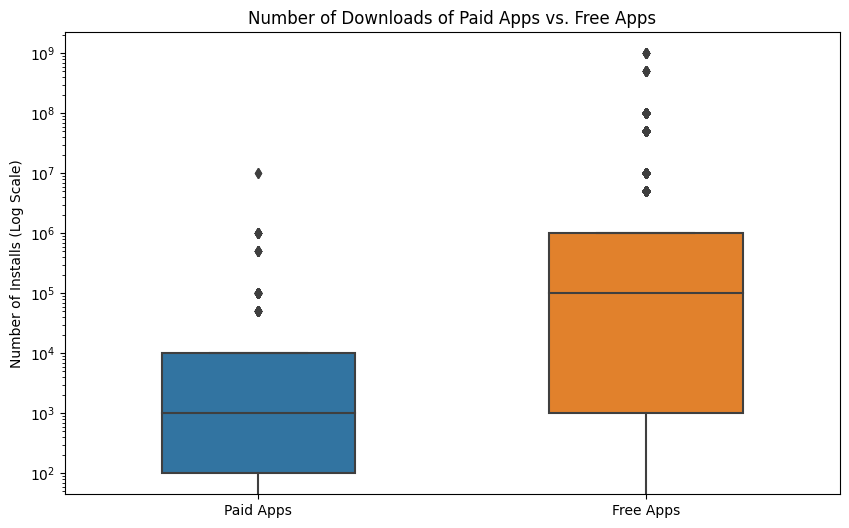

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for paid and free apps
paid_apps = apps[apps['Type'] == 'Paid']
free_apps = apps[apps['Type'] == 'Free']

# Create a figure and axes
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=[paid_apps['Installs'], free_apps['Installs']], width=0.5)

# Set labels and title
ax.set_xticklabels(['Paid Apps', 'Free Apps'])
ax.set_ylabel('Number of Installs (Log Scale)')
ax.set_title('Number of Downloads of Paid Apps vs. Free Apps')

# Set y-axis to log scale
ax.set_yscale('log')

# Show the plot
plt.show()


#Correlation between App rating and Installs


Examining the correlation between app ratings and installations reveals an interesting trend. While there is a mild positive correlation between these two factors, it is not particularly strong. This implies that higher app ratings do tend to correspond to a greater number of installations, but other variables also influence an app's popularity and user base. In essence, a high app rating can contribute to more installations, but it is not the sole determining factor.

The correlation coefficient of 0.040 suggests a very weak positive correlation between app ratings and installations. This indicates that there is a slight tendency for apps with higher ratings to have more installations, but the relationship between the two factors is not strong. Other variables likely play a more significant role in influencing the number of app installations.

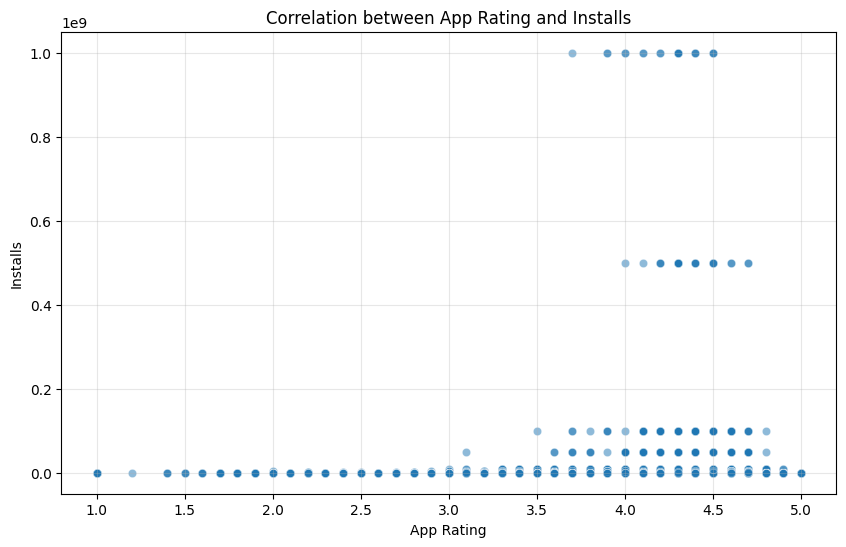

Correlation coefficient: 0.040143372891308204


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=apps, x='Rating', y='Installs', alpha=0.5)
plt.title("Correlation between App Rating and Installs")
plt.xlabel("App Rating")
plt.ylabel("Installs")
plt.grid(True, alpha= 0.3)
plt.show()

# Calculate the correlation coefficient
correlation = apps['Rating'].corr(apps['Installs'])
print("Correlation coefficient:", correlation)



#**Sentiment analysis of user reviews**

Sentiment analysis is a way to figure out how people feel about something by looking at their comments. For apps, it helps us see if the reviews are positive, negative, or just okay. For example, good words like 'amazing' show positivity, while bad words like 'hate' show negativity.

When we looked at reviews for free and paid apps, we saw that free apps sometimes get really negative comments. But paid apps usually have better comments and aren't as negative. This might mean paid apps are generally better. Overall, we looked at lots of apps on the Google Play Store and learned things that can help us if we want to make our own app someday.



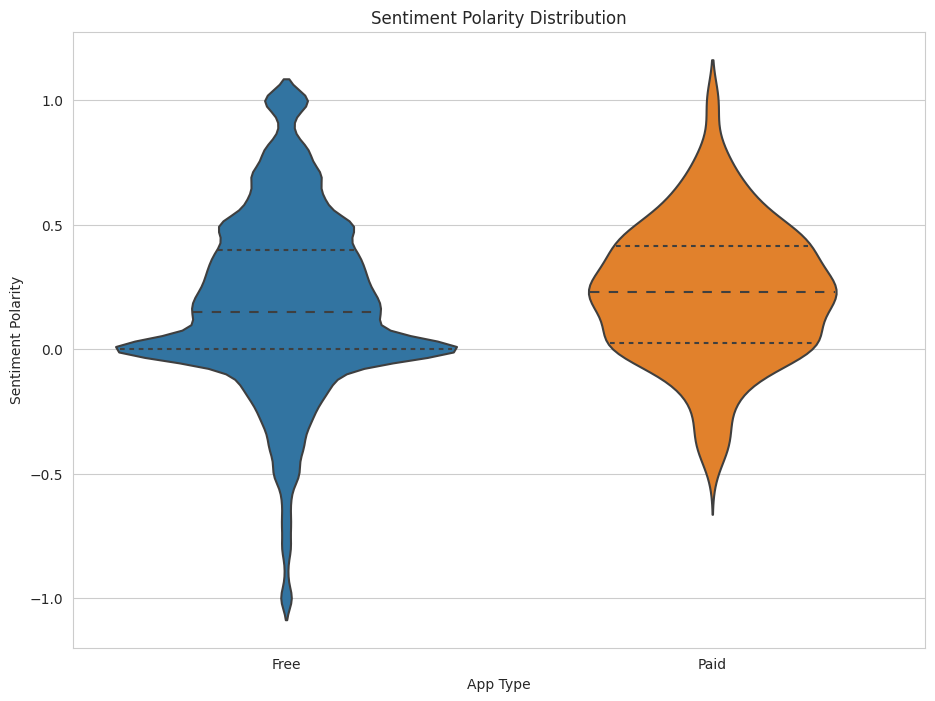

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load user_reviews.csv
reviews_df = pd.read_csv("/content/user_reviews.csv")

# Join and merge the two dataframes
merged_df = pd.merge(apps, reviews_df, on="App", how="inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

# Set the style and create a figure and axes
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity distribution for paid vs. free apps using a violin plot
sns.violinplot(x="Type", y="Sentiment_Polarity", data=merged_df, inner='quartiles')
ax.set_title('Sentiment Polarity Distribution')
plt.xlabel('App Type')
plt.ylabel('Sentiment Polarity')

plt.show()



 When we used a violin chart to look at reviews for free and paid apps, we noticed that free apps sometimes have really negative comments, while paid apps usually have better comments. This suggests that paid apps might be better in quality overall. This information can be helpful for anyone wanting to create their own app in the future.

#**Remove null values from reviews_df**

By null I mean NaN, we can use the dropna() function to get this job done

In [11]:
reviews_df = reviews_df.dropna()


#**Displaying histogram to understand "Sentiment" distribution**

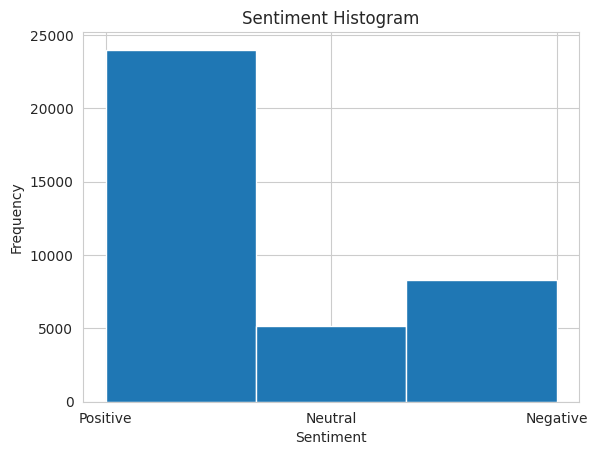

In [12]:
import matplotlib.pyplot as plt

# Sentiment histogram
plt.hist(reviews_df["Sentiment"], bins=3)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Histogram")
plt.show()

We can observe that majority of reviews are positive followed by negative and then neutral

#**Few positive reviews**

In [13]:
positive_reviews = reviews_df[reviews_df["Sentiment"] == "Positive"]["Translated_Review"].head(10)
print(positive_reviews)

0     I like eat delicious food. That's I'm cooking ...
1       This help eating healthy exercise regular basis
3            Works great especially going grocery store
4                                          Best idea us
5                                              Best way
6                                               Amazing
10                                            good you.
11    Useful information The amount spelling errors ...
12    Thank you! Great app!! Add arthritis, eyes, im...
13    Greatest ever Completely awesome maintain heal...
Name: Translated_Review, dtype: object


#**Few neutral reviews**

In [14]:
negative_reviews = reviews_df[reviews_df["Sentiment"] == "Negative"]["Translated_Review"].head(10)
print(negative_reviews)


32                    No recipe book Unable recipe book.
43     Waste time It needs internet time n ask calls ...
68                               Faltu plz waste ur time
85                                     Crap Doesn't work
95     Boring. I thought actually just texts that's i...
132                   No recipe book Unable recipe book.
143    Waste time It needs internet time n ask calls ...
168                              Faltu plz waste ur time
185                                    Crap Doesn't work
195    Boring. I thought actually just texts that's i...
Name: Translated_Review, dtype: object


# Executive Summary

In this project, we delve into the dynamic landscape of the Android app market with the aim of identifying strategies for growth and user retention. Our analysis is based on a comprehensive dataset containing thousands of Android apps across various categories. By examining app attributes, user reviews, and trends, we seek to uncover insights that can drive success in this competitive environment.

## Key Findings

- The Android app market is highly competitive, with a diverse range of categories and app offerings.
- User engagement and retention play a crucial role in app success, with higher retention rates correlating to higher growth potential.
- Successful apps often have a user-centric approach, offering innovative features and maintaining regular updates based on user feedback.
- Categories such as Entertainment and Tools exhibit strong potential for growth and user engagement.

## Recommendations

- Developers should focus on enhancing user experience, ensuring seamless navigation, and listening to user feedback.
- Regular updates and feature enhancements can keep users engaged and attract new users.
- Implementing a combination of free and paid versions can provide users with choice while monetizing the app effectively.

## Conclusion

The Android app market is a realm brimming with possibilities for developers who grasp user preferences, innovate, and adapt. This project serves as a roadmap for app developers navigating this landscape, empowering them to maximize their app's potential for growth and user retention